In [1]:
import pandas as pd

# Load the provided datasets
train_file_path = 'train.csv'
test_file_path = 'test.csv'
gender_submission_file_path = 'gender_submission.csv'

# Reading the datasets
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)
gender_submission_df = pd.read_csv(gender_submission_file_path)

# Displaying the first few rows of each dataset to understand their structure
train_head = train_df.head()
test_head = test_df.head()
gender_submission_head = gender_submission_df.head()

(train_head, test_head, gender_submission_head)


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [2]:
# General Analysis of the Training Data

# Basic statistical overview
train_description = train_df.describe(include='all')

# Checking for missing values in the training dataset
missing_values_train = train_df.isnull().sum()

# Checking for unique values in each column to understand the diversity of data
unique_values_train = train_df.nunique()

# Overview of correlation between features, especially with the target variable 'Survived'
correlation_matrix = train_df.corr(numeric_only=True)

train_description, missing_values_train, unique_values_train, correlation_matrix


(        PassengerId    Survived      Pclass                     Name   Sex  \
 count    891.000000  891.000000  891.000000                      891   891   
 unique          NaN         NaN         NaN                      891     2   
 top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
 freq            NaN         NaN         NaN                        1   577   
 mean     446.000000    0.383838    2.308642                      NaN   NaN   
 std      257.353842    0.486592    0.836071                      NaN   NaN   
 min        1.000000    0.000000    1.000000                      NaN   NaN   
 25%      223.500000    0.000000    2.000000                      NaN   NaN   
 50%      446.000000    0.000000    3.000000                      NaN   NaN   
 75%      668.500000    1.000000    3.000000                      NaN   NaN   
 max      891.000000    1.000000    3.000000                      NaN   NaN   
 
                Age       SibSp       Parch  Ticke

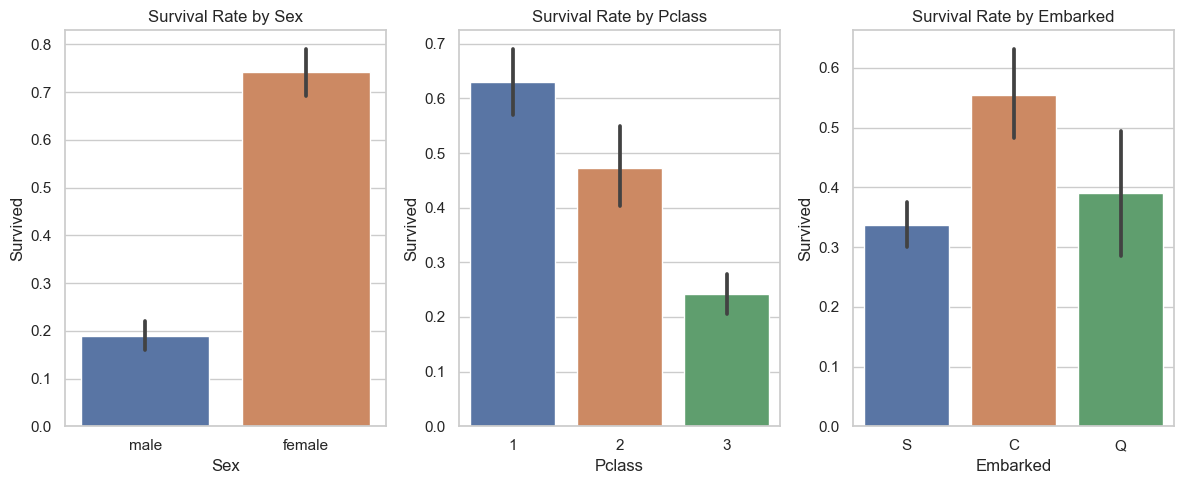

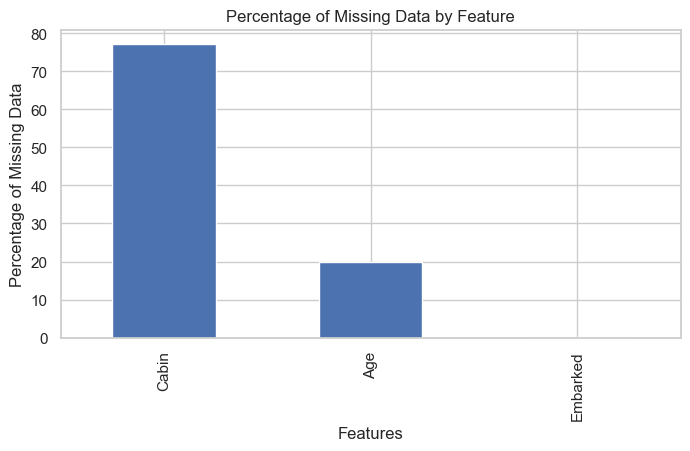

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Detailed Analysis of Categorical Features: 'Sex', 'Pclass', and 'Embarked'

# Survival rate by Sex
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')

# Survival rate by Pclass
plt.subplot(1, 3, 2)
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')

# Survival rate by Embarked
plt.subplot(1, 3, 3)
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival Rate by Embarked')

# Show the plots
plt.tight_layout()
plt.show()

# Handling Missing Data: 'Age', 'Cabin', and 'Embarked'
# Displaying the percentage of missing data for these columns
missing_percentage = train_df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(inplace=True, ascending=False)

# Plotting the missing data percentages
plt.figure(figsize=(8, 4))
missing_percentage.plot.bar()
plt.title('Percentage of Missing Data by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Data')
plt.show()


In [4]:
# Handling Missing Data and Feature Engineering

# Imputation for 'Age'
# Using median age for imputation to handle potential outliers
median_age = train_df['Age'].median()
train_df['Age'].fillna(median_age, inplace=True)

# Imputation for 'Embarked'
# Using the mode (most common value)
mode_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(mode_embarked, inplace=True)

# Handling 'Cabin'
# Extracting the first letter of the Cabin as a new feature, 'CabinType'
train_df['CabinType'] = train_df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')

# Feature Engineering
# Creating 'FamilySize' from 'SibSp' and 'Parch'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Encoding categorical variables
# Converting 'Sex' and 'Embarked' to numerical values
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Displaying the modified DataFrame
modified_columns = ['Age', 'Embarked', 'CabinType', 'FamilySize', 'Sex']
train_df[modified_columns].head()


,Age,Embarked,CabinType,FamilySize,Sex
0,22.0,0,Unknown,2,0
1,38.0,1,C,2,1
2,26.0,0,Unknown,1,1
3,35.0,0,C,2,1
4,35.0,0,Unknown,1,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Preparing the data for modeling
# Selecting features for the model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']
X = train_df[features]
y = train_df['Survived']

# Keep column names for later
feature_names = X.columns

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Model Selection and Training

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_val_scaled)
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_val_scaled)
accuracy_rf = accuracy_score(y_val, y_pred_rf)

accuracy_logreg, accuracy_rf


(0.7988826815642458, 0.8212290502793296)

In [6]:
from sklearn.model_selection import GridSearchCV

# Setting up GridSearchCV for hyperparameter tuning of Random Forest Classifier
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Create the GridSearchCV object
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), parameters, cv=5, scoring='accuracy')

# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = rf_grid_search.best_params_
best_score = rf_grid_search.best_score_

best_params, best_score



({'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 6,
  'n_estimators': 100},
 0.8370432384516893)

In [7]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Setting up RandomizedSearchCV for hyperparameter tuning of Random Forest Classifier
parameters = {
    'n_estimators': np.arange(50, 301, 50),
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Create the RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                                      parameters, 
                                      n_iter=10, # number of parameter settings sampled
                                      cv=5, 
                                      scoring='accuracy', 
                                      random_state=42)

# Fit the random search to the data
rf_random_search.fit(X_train, y_train)

# Best parameters and best score
best_params_random = rf_random_search.best_params_
best_score_random = rf_random_search.best_score_

best_params_random, best_score_random



({'n_estimators': 250,
  'min_samples_split': 2,
  'min_samples_leaf': 4,
  'max_depth': 5},
 0.824386880724909)

In [8]:
# Train the final model using the optimized parameters

# Best parameters from Randomized Search
best_params = {
    'n_estimators': 250,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'max_depth': 5
}

# Defining and training the RandomForestClassifier with new features
rf_model_with_new_features = RandomForestClassifier(random_state=42, **best_params)

# Creating and training the Random Forest model with the best parameters
final_rf_model = RandomForestClassifier(random_state=42, **best_params)
final_rf_model.fit(X_train, y_train)

# Predicting on the validation set
final_predictions = final_rf_model.predict(X_val)

# Evaluating the final model
final_accuracy = accuracy_score(y_val, final_predictions)
final_classification_report = classification_report(y_val, final_predictions)

# Defining and training the RandomForestClassifier with new features
rf_model_with_new_features = RandomForestClassifier(random_state=42, **best_params)

# Analyzing feature importance
feature_importances = final_rf_model.feature_importances_
features_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

final_accuracy, final_classification_report, features_importance_df



(0.8044692737430168,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.89      0.84       105\n           1       0.81      0.69      0.74        74\n\n    accuracy                           0.80       179\n   macro avg       0.81      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n',
       Feature  Importance
 1         Sex    0.450710
 5        Fare    0.168247
 0      Pclass    0.130484
 2         Age    0.101590
 7  FamilySize    0.064514
 3       SibSp    0.033751
 6    Embarked    0.025587
 4       Parch    0.025116)

1. Advanced Feature Engineering: Title Extraction

In [9]:
# Extract titles from the 'Name' column
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify titles - group rare titles into one category
for df in [train_df, test_df]:
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                       'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

# One-hot encoding of the 'Title' feature
train_df = pd.get_dummies(train_df, columns=['Title'])
test_df = pd.get_dummies(test_df, columns=['Title'])


print(test_df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Title_Master  \
0  34.5      0      0   330911   7.8292   NaN        Q         False   
1  47.0      1      0   363272   7.0000   NaN        S         False   
2  62.0      0      0   240276   9.6875   NaN        Q         False   
3  27.0      0      0   315154   8.6625   NaN        S         False   
4  22.0      1      1  3101298  12.2875   NaN        S         False   

   Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0       False      True      False   

2. Experimenting with Gradient Boosting Machine (GBM)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the GBM model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)

# Predict on the validation set
gbm_predictions = gbm_model.predict(X_val)

# Evaluate the GBM model
gbm_accuracy = accuracy_score(y_val, gbm_predictions)


3. Stratified K-Fold Cross-Validation

In [11]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)

# Evaluate the Random Forest model using cross-validation
rf_cross_val_scores = cross_val_score(final_rf_model, X_scaled, y, cv=skf, scoring='accuracy')

# Calculate the average and standard deviation of the cross-validation scores
rf_cv_accuracy = np.mean(rf_cross_val_scores)
rf_cv_std = np.std(rf_cross_val_scores)

In [12]:
# Redefining Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)

# Re-running Stratified K-Fold Cross-Validation for the Random Forest model with new features
rf_cross_val_scores = cross_val_score(rf_model_with_new_features, X_train_scaled, y_train, cv=skf, scoring='accuracy')
rf_cv_accuracy = np.mean(rf_cross_val_scores)
rf_cv_std = np.std(rf_cross_val_scores)

# Results for GBM and Random Forest with new features
gbm_accuracy, rf_cv_accuracy, rf_cv_std

(0.8044692737430168, 0.824386880724909, 0.03140385880815053)

In [13]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Defining the base models for the stacking ensemble
base_models = [
    ('rf', RandomForestClassifier(random_state=42, **best_params)),
    ('gbm', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

# Final estimator for the stacking ensemble
final_estimator = LogisticRegression()

# Creating the stacking ensemble
stacking_model = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)

# Training the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Predicting and evaluating on the validation set
stacking_predictions = stacking_model.predict(X_val_scaled)
stacking_accuracy = accuracy_score(y_val, stacking_predictions)

stacking_accuracy



0.8100558659217877

Feature Importance Analysis in Base Models

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculating additional evaluation metrics for the stacking model
precision = precision_score(y_val, stacking_predictions)
recall = recall_score(y_val, stacking_predictions)
f1 = f1_score(y_val, stacking_predictions)
roc_auc = roc_auc_score(y_val, stacking_model.predict_proba(X_val_scaled)[:, 1])

precision, recall, f1, roc_auc



(0.8125, 0.7027027027027027, 0.7536231884057971, 0.8980694980694981)

In [15]:
# Extracting feature importances from the base models of the stacking ensemble
rf_feature_importances = stacking_model.named_estimators_['rf'].feature_importances_
gbm_feature_importances = stacking_model.named_estimators_['gbm'].feature_importances_

# Creating DataFrames for feature importances
rf_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_feature_importances})
gbm_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': gbm_feature_importances})

# Sorting the DataFrames by importance
rf_importances_sorted = rf_importances_df.sort_values(by='Importance', ascending=False)
gbm_importances_sorted = gbm_importances_df.sort_values(by='Importance', ascending=False)

rf_importances_sorted, gbm_importances_sorted


(      Feature  Importance
 1         Sex    0.450710
 5        Fare    0.168247
 0      Pclass    0.130484
 2         Age    0.101590
 7  FamilySize    0.064514
 3       SibSp    0.033751
 6    Embarked    0.025587
 4       Parch    0.025116,
       Feature  Importance
 1         Sex    0.464933
 5        Fare    0.166436
 0      Pclass    0.149041
 2         Age    0.133571
 7  FamilySize    0.047459
 3       SibSp    0.017832
 6    Embarked    0.017165
 4       Parch    0.003562)

In [16]:
# Refining the feature set

# Removing low importance features: 'Parch' and 'SibSp'
refined_features = X_train.columns.drop(['Parch', 'SibSp'])

# Creating interaction terms for important features
# For simplicity, let's create an interaction term between 'Age' and 'Pclass'
train_df['Age_Pclass'] = train_df['Age'] * train_df['Pclass']
test_df['Age_Pclass'] = test_df['Age'] * train_df['Pclass']

# Adding the interaction term to the feature set
refined_features = refined_features.append(pd.Index(['Age_Pclass']))

# Updating the train and validation sets with the refined feature set
X_train_refined = train_df[refined_features].iloc[X_train.index]
X_val_refined = train_df[refined_features].iloc[X_val.index]

# Re-scaling the refined features
X_train_scaled_refined = scaler.fit_transform(X_train_refined)
X_val_scaled_refined = scaler.transform(X_val_refined)

# Re-training the Random Forest and GBM models with the refined feature set
rf_model_refined = RandomForestClassifier(random_state=42, **best_params)
gbm_model_refined = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

rf_model_refined.fit(X_train_scaled_refined, y_train)
gbm_model_refined.fit(X_train_scaled_refined, y_train)

# Re-training the stacking ensemble
stacking_model_refined = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)
stacking_model_refined.fit(X_train_scaled_refined, y_train)

# Re-evaluating the models
rf_predictions_refined = rf_model_refined.predict(X_val_scaled_refined)
gbm_predictions_refined = gbm_model_refined.predict(X_val_scaled_refined)
stacking_predictions_refined = stacking_model_refined.predict(X_val_scaled_refined)

rf_accuracy_refined = accuracy_score(y_val, rf_predictions_refined)
gbm_accuracy_refined = accuracy_score(y_val, gbm_predictions_refined)
stacking_accuracy_refined = accuracy_score(y_val, stacking_predictions_refined)

rf_accuracy_refined, gbm_accuracy_refined, stacking_accuracy_refined

(0.8268156424581006, 0.8268156424581006, 0.8324022346368715)

In [17]:
#Scaling the test data features
X_test_interactions = test_df[refined_features]
X_test_scaled_interactions = scaler.transform(X_test_interactions)

# Generating predictions using the stacking model with interaction terms
final_test_predictions = stacking_model_refined.predict(X_test_scaled_interactions)

# Creating the submission DataFrame
final_submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': final_test_predictions
})

# Saving the submission file
submission_file_path = 'titanic_stacking_submission-final.csv'
final_submission.to_csv(submission_file_path, index=False)

submission_file_path

KeyError: "['FamilySize'] not in index"

In [ ]:
if __name__ == "__main__":
    # Assuming paths to your training and test datasets
    train_data_path = 'path/to/train.csv'
    test_data_path = 'path/to/test.csv'
    
    # Loading and preprocessing the training data
    train_df = load_dataset(train_data_path)
    train_df = fill_missing_values(train_df)
    train_df = preprocess_test_data(train_df, train_df)  # Using the same preprocessing for simplicity
    
    # Feature engineering
    train_df = create_family_size_feature(train_df)
    train_df = drop_unnecessary_features(train_df)
    train_df = extract_and_process_titles(train_df)
    train_df = add_interaction_terms(train_df)
    
    # Prepare features and target
    X = train_df.drop('Survived', axis=1)
    y = train_df['Survived']
    
    # Train the model
    model_trainer = ModelTrainer(RandomForestClassifier(), best_params)
    final_model = model_trainer.train(X, y)
    
    # Preparing the test data (X_test)
    test_df = load_dataset(test_data_path)
    test_df = fill_missing_values(test_df)
    test_df = preprocess_test_data(test_df, train_df)  # Note: Use train_df for filling missing values
    test_df = create_family_size_feature(test_df)
    test_df = drop_unnecessary_features(test_df)
    test_df = extract_and_process_titles(test_df)
    test_df = add_interaction_terms(test_df)
    X_test = test_df  # Assuming no target variable in the test set
    
    # Optionally, you could save final_model and X_test for later use
    # e.g., final_model.save('path/to/save_model.pkl')
    # X_test.to_csv('path/to/save_X_test.csv')
